In [ ]:
import requests

# Đường dẫn tới API ngrok
NGROK_URL = "https://8060-35-231-124-1.ngrok-free.app/upload_image"

# Đường dẫn tới file ảnh
image_path = "/content/000003 (1).jpg"  # Thay bằng đường dẫn thực tế của ảnh

# Gửi yêu cầu POST với trường "image"
with open(image_path, "rb") as image_file:
    response = requests.post(
        NGROK_URL,
        files={"image": image_file}  # Đúng tên trường phải là "image"
    )

# In kết quả phản hồi từ server
print("Response status:", response.status_code)
print("Response JSON:", response.json())


Response status: 200
Response JSON: {'bounding_boxes': [{'coordinates': [129.4560089111328, 143.43270874023438, 143.51025390625, 157.3451690673828], 'class_id': 6}, {'coordinates': [161.60107421875, 56.99836730957031, 177.75375366210938, 82.2406005859375], 'class_id': 10}, {'coordinates': [30.73975944519043, 67.731201171875, 42.9703483581543, 87.68882751464844], 'class_id': 6}, {'coordinates': [22.034982681274414, 92.42511749267578, 29.358322143554688, 111.33956146240234], 'class_id': 6}, {'coordinates': [50.301048278808594, 145.22137451171875, 60.90110778808594, 160.50579833984375], 'class_id': 10}, {'coordinates': [45.07024383544922, 129.6453628540039, 55.67123031616211, 139.02434635162354], 'class_id': 10}, {'coordinates': [32.09618377685547, 113.43283081054688, 49.39494323730469, 134.85964965820312], 'class_id': 10}, {'coordinates': [162.87152099609375, 149.666259765625, 178.22000122070312, 171.77127075195312], 'class_id': 10}, {'coordinates': [146.18948364257812, 137.1602020263672

Ảnh đã được lưu tại: decoded_output.png


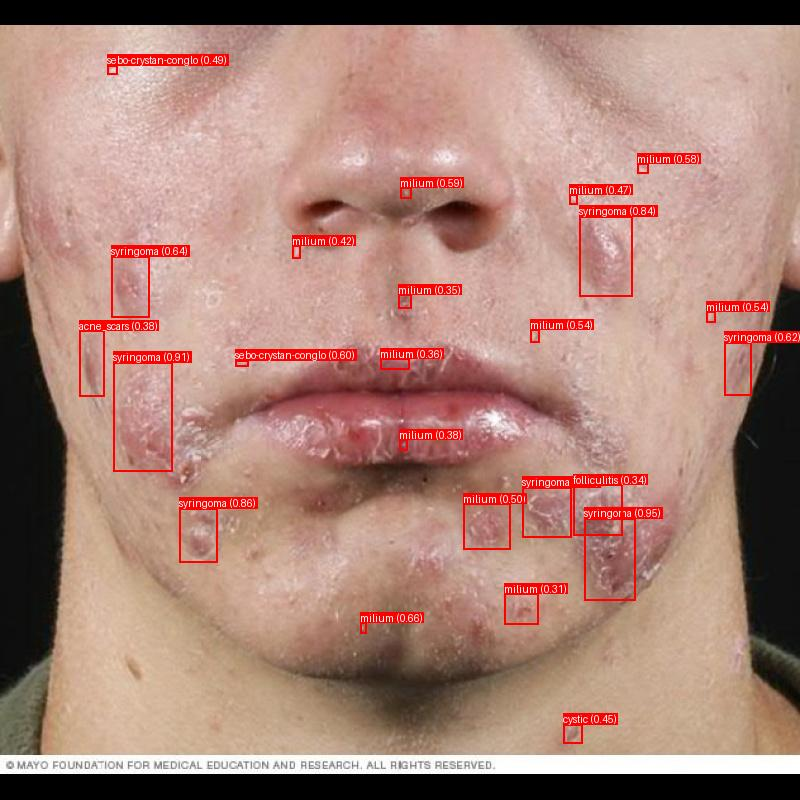

Bounding Boxes: [{'class_id': 'milium', 'cords': [463, 503, 510, 549], 'percentage_conf': '50'}, {'class_id': 'syringoma', 'cords': [522, 487, 571, 537], 'percentage_conf': '46'}, {'class_id': 'syringoma', 'cords': [579, 216, 632, 296], 'percentage_conf': '84'}, {'class_id': 'acne_scars', 'cords': [79, 330, 104, 396], 'percentage_conf': '38'}, {'class_id': 'syringoma', 'cords': [179, 508, 217, 562], 'percentage_conf': '86'}, {'class_id': 'milium', 'cords': [399, 439, 407, 450], 'percentage_conf': '38'}, {'class_id': 'syringoma', 'cords': [111, 256, 149, 317], 'percentage_conf': '64'}, {'class_id': 'syringoma', 'cords': [113, 362, 172, 471], 'percentage_conf': '91'}, {'class_id': 'syringoma', 'cords': [584, 518, 635, 600], 'percentage_conf': '95'}, {'class_id': 'sebo-crystan-conglo', 'cords': [107, 65, 117, 74], 'percentage_conf': '49'}, {'class_id': 'folliculitis', 'cords': [573, 484, 622, 535], 'percentage_conf': '34'}, {'class_id': 'milium', 'cords': [398, 294, 411, 308], 'percentage

In [ ]:
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =  "https://ac4f-34-171-122-159.ngrok-free.app" # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/000003 (1).jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")
    except Exception as e:
        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


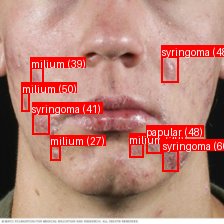

Bounding Boxes: [{'class_id': 'milium', 'cords': [129.21, 143.67, 143.62, 157.19], 'percentage_conf': '38'}, {'class_id': 'milium', 'cords': [30.74, 67.58, 43.31, 88.33], 'percentage_conf': '39'}, {'class_id': 'syringoma', 'cords': [161.54, 56.95, 178.05, 82.84], 'percentage_conf': '48'}, {'class_id': 'milium', 'cords': [21.94, 92.61, 29.27, 111.24], 'percentage_conf': '50'}, {'class_id': 'milium', 'cords': [50.29, 145.35, 60.91, 160.53], 'percentage_conf': '27'}, {'class_id': 'syringoma', 'cords': [32.11, 113.57, 49.47, 134.87], 'percentage_conf': '41'}, {'class_id': 'syringoma', 'cords': [162.92, 150.59, 178.35, 171.86], 'percentage_conf': '60'}, {'class_id': 'papular', 'cords': [146.08, 136.93, 161.59, 153.78], 'percentage_conf': '48'}]
Total Acnes: 8
Time Taken: 1.52 giây


In [ ]:
# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =   "https://7dee-34-171-122-159.ngrok-free.app"# Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/000003 (1).jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


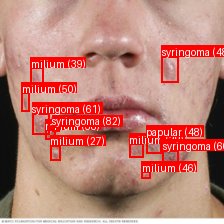

Bounding Boxes: [{'class_id': 'milium', 'cords': [129.21, 143.57, 143.62, 157.19], 'percentage_conf': '38'}, {'class_id': 'milium', 'cords': [30.74, 67.58, 43.31, 88.33], 'percentage_conf': '39'}, {'class_id': 'syringoma', 'cords': [161.54, 56.95, 178.05, 82.84], 'percentage_conf': '48'}, {'class_id': 'milium', 'cords': [21.94, 92.61, 29.27, 111.24], 'percentage_conf': '50'}, {'class_id': 'milium', 'cords': [45.11, 129.57, 55.47, 139.05], 'percentage_conf': '38'}, {'class_id': 'milium', 'cords': [50.29, 145.35, 60.91, 160.53], 'percentage_conf': '27'}, {'class_id': 'syringoma', 'cords': [32.11, 113.57, 49.47, 134.87], 'percentage_conf': '61'}, {'class_id': 'syringoma', 'cords': [162.92, 150.59, 178.35, 171.86], 'percentage_conf': '60'}, {'class_id': 'papular', 'cords': [146.08, 136.93, 161.59, 153.78], 'percentage_conf': '48'}, {'class_id': 'syringoma', 'cords': [52.16, 126.45, 59.31, 131.86], 'percentage_conf': '82'}, {'class_id': 'milium', 'cords': [141.65, 171.95, 150.45, 178.69], '

In [ ]:
# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =    "https://213e-34-171-122-159.ngrok-free.app"# Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/000003 (1).jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


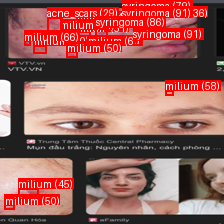

Bounding Boxes: [{'class_id': 'milium', 'cords': [76.75, 21.05, 95.96, 31.24], 'percentage_conf': '45'}, {'class_id': 'milium', 'cords': [73.94, 31.87, 90.14, 42.07], 'percentage_conf': '51'}, {'class_id': 'milium', 'cords': [33.6, 45.49, 46.74, 53.43], 'percentage_conf': '60'}, {'class_id': 'acne_scars', 'cords': [136.97, 16.71, 147.37, 27.7], 'percentage_conf': '36'}, {'class_id': 'milium', 'cords': [60.19, 29.23, 72.65, 36.34], 'percentage_conf': '51'}, {'class_id': 'milium', 'cords': [87.85, 45.14, 98.65, 52.84], 'percentage_conf': '60'}, {'class_id': 'milium', 'cords': [66.61, 51.72, 77.79, 57.92], 'percentage_conf': '50'}, {'class_id': 'milium', 'cords': [18.03, 188.47, 38.65, 199.96], 'percentage_conf': '45'}, {'class_id': 'syringoma', 'cords': [122.15, 10.81, 134.3, 17.53], 'percentage_conf': '79'}, {'class_id': 'syringoma', 'cords': [122.45, 17.51, 136.59, 25.71], 'percentage_conf': '91'}, {'class_id': 'milium', 'cords': [4.97, 204.6, 14.66, 209.88], 'percentage_conf': '50'}, 

In [ ]:
# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =    "https://213e-34-171-122-159.ngrok-free.app"# Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/Ảnh màn hình 2025-01-20 lúc 14.08.34.png"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


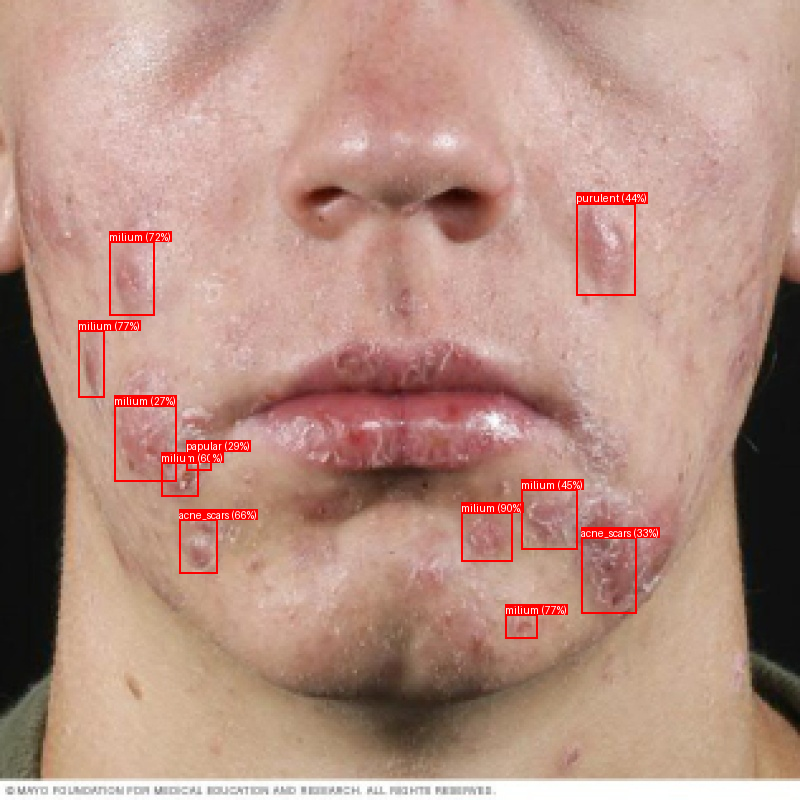

Bounding Boxes: [{'class_id': 'milium', 'cords': [461, 512, 512, 561], 'percentage_conf': '90'}, {'class_id': 'milium', 'cords': [109, 241, 154, 315], 'percentage_conf': '72'}, {'class_id': 'purulent', 'cords': [576, 203, 635, 295], 'percentage_conf': '44'}, {'class_id': 'milium', 'cords': [78, 330, 104, 397], 'percentage_conf': '77'}, {'class_id': 'milium', 'cords': [161, 462, 198, 496], 'percentage_conf': '60'}, {'class_id': 'acne_scars', 'cords': [179, 519, 217, 573], 'percentage_conf': '66'}, {'class_id': 'milium', 'cords': [114, 405, 176, 481], 'percentage_conf': '27'}, {'class_id': 'acne_scars', 'cords': [581, 537, 636, 613], 'percentage_conf': '33'}, {'class_id': 'milium', 'cords': [521, 489, 577, 549], 'percentage_conf': '45'}, {'class_id': 'papular', 'cords': [186, 451, 211, 470], 'percentage_conf': '29'}, {'class_id': 'milium', 'cords': [505, 614, 537, 638], 'percentage_conf': '77'}]
Total Acnes: 11
Time Taken: 7.34 giây


In [ ]:
# cắt 9 lát
# mapping

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =    "https://a9ba-34-171-122-159.ngrok-free.app" # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/000003 (1).jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


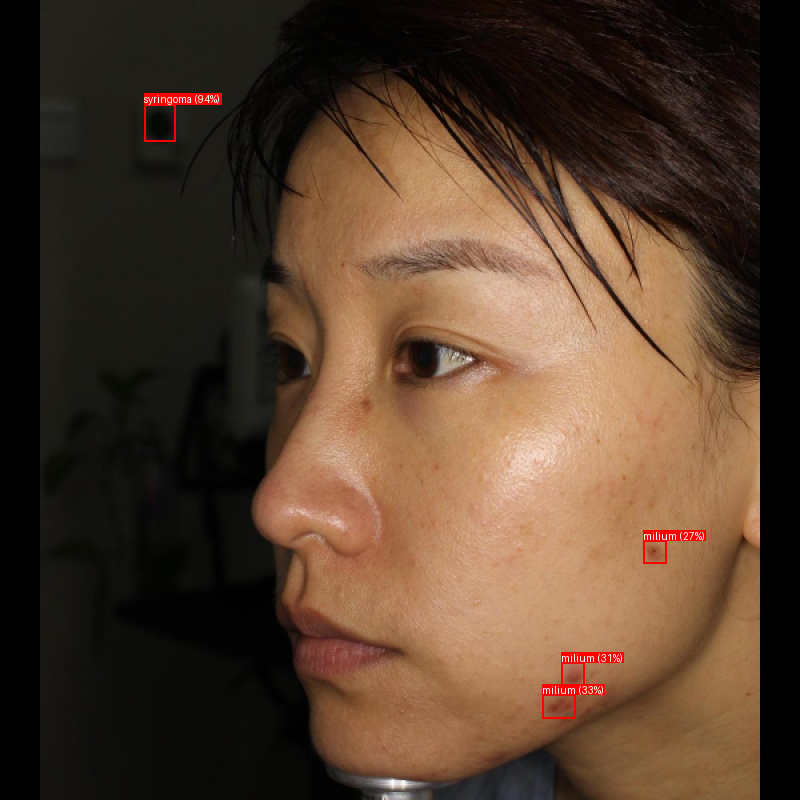

Bounding Boxes: [{'class_id': 'syringoma', 'cords': [144, 104, 175, 141], 'percentage_conf': '94'}, {'class_id': 'milium', 'cords': [561, 662, 584, 689], 'percentage_conf': '31'}, {'class_id': 'milium', 'cords': [542, 694, 575, 718], 'percentage_conf': '33'}, {'class_id': 'milium', 'cords': [643, 540, 666, 563], 'percentage_conf': '27'}]
Total Acnes: 4
Time Taken: 6.25 giây


In [ ]:
# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =   "https://7b92-35-185-166-129.ngrok-free.app" # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/levle0_2_jpg.rf.f9c6fdd5c15c901eb7a35c6bd1be2283.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


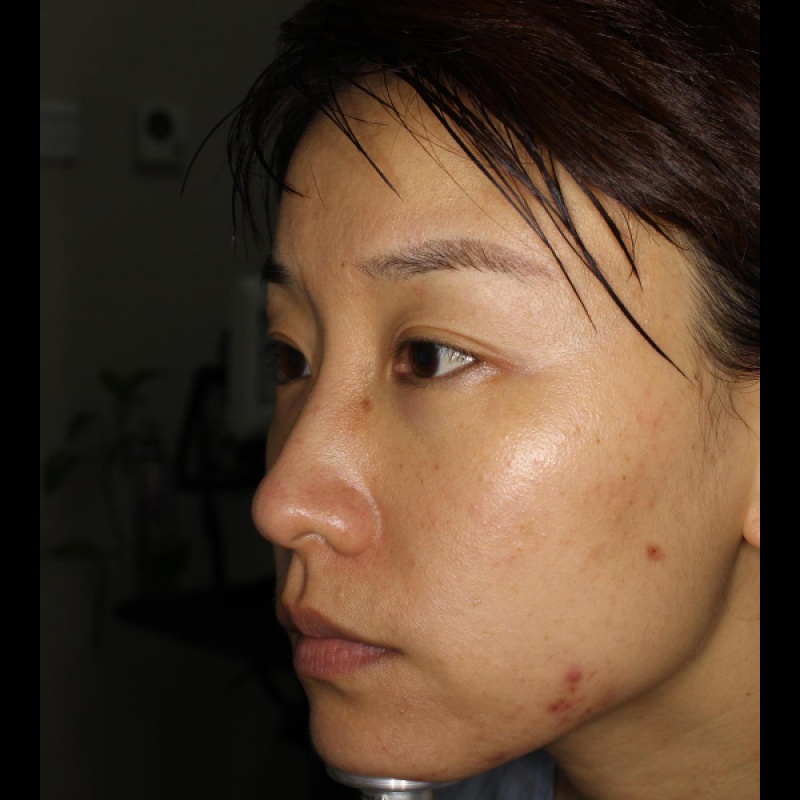

Bounding Boxes: []
Total Acnes: 0
Time Taken: 33.95 giây


In [ ]:
# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =  "https://f983-35-185-166-129.ngrok-free.app"   # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/levle0_2_jpg.rf.f9c6fdd5c15c901eb7a35c6bd1be2283.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


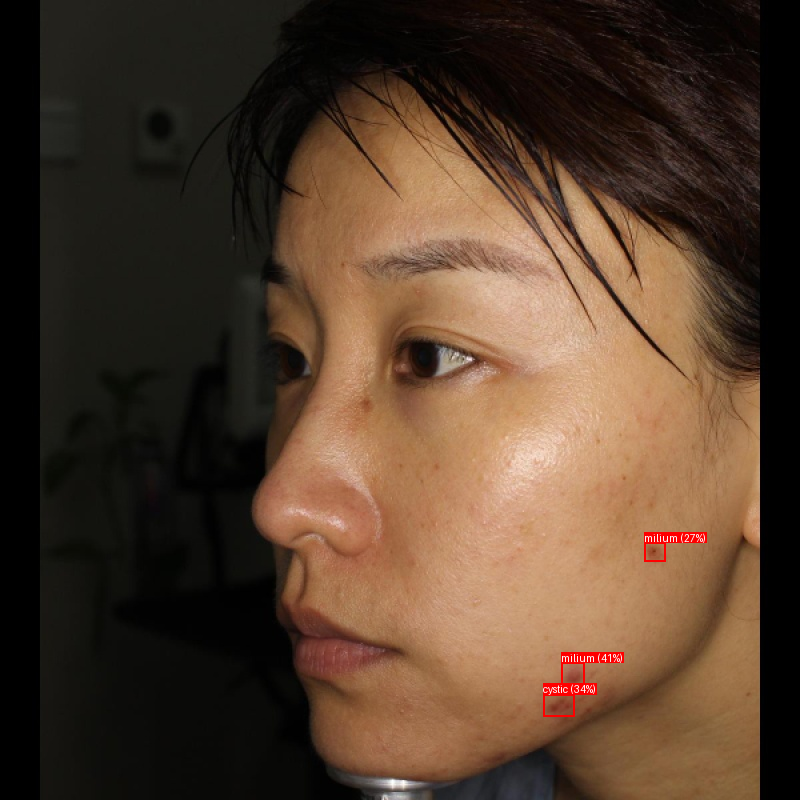

Bounding Boxes: [{'class_id': 'milium', 'cords': [561, 662, 584, 688], 'percentage_conf': '41'}, {'class_id': 'cystic', 'cords': [543, 694, 574, 716], 'percentage_conf': '34'}, {'class_id': 'milium', 'cords': [644, 542, 665, 561], 'percentage_conf': '27'}]
Total Acnes: 3
Time Taken: 23.83 giây


In [ ]:
# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =   "https://6926-35-185-166-129.ngrok-free.app" # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/levle0_2_jpg.rf.f9c6fdd5c15c901eb7a35c6bd1be2283.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


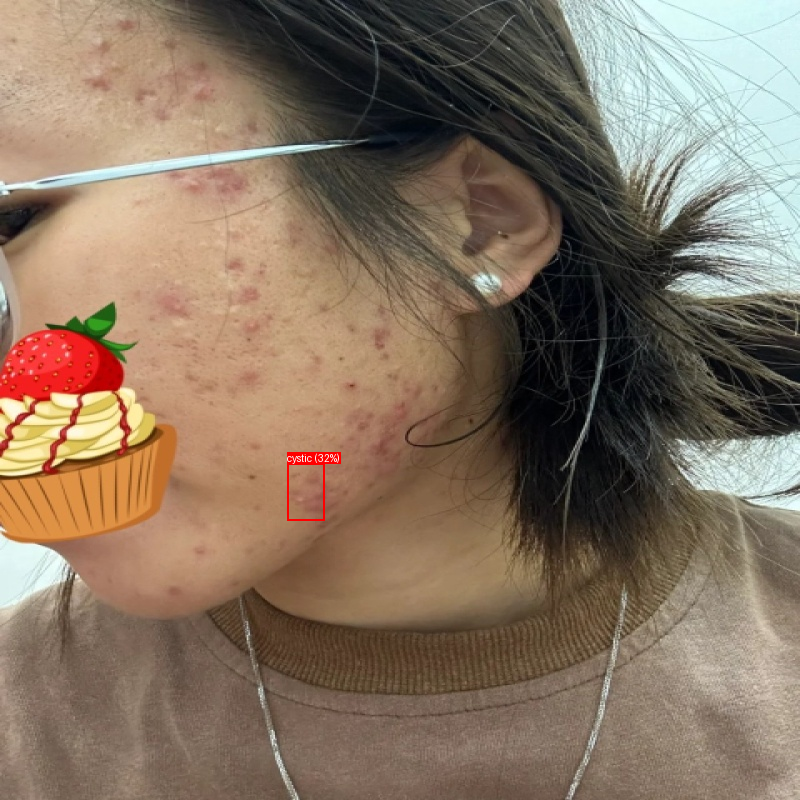

Bounding Boxes: [{'class_id': 'cystic', 'cords': [287, 463, 324, 520], 'percentage_conf': '32'}]
Total Acnes: 1
Time Taken: 34.31 giây


In [ ]:


# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =  "https://f983-35-185-166-129.ngrok-free.app"  # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/473026032_1263662471528750_8799095583983098227_n.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


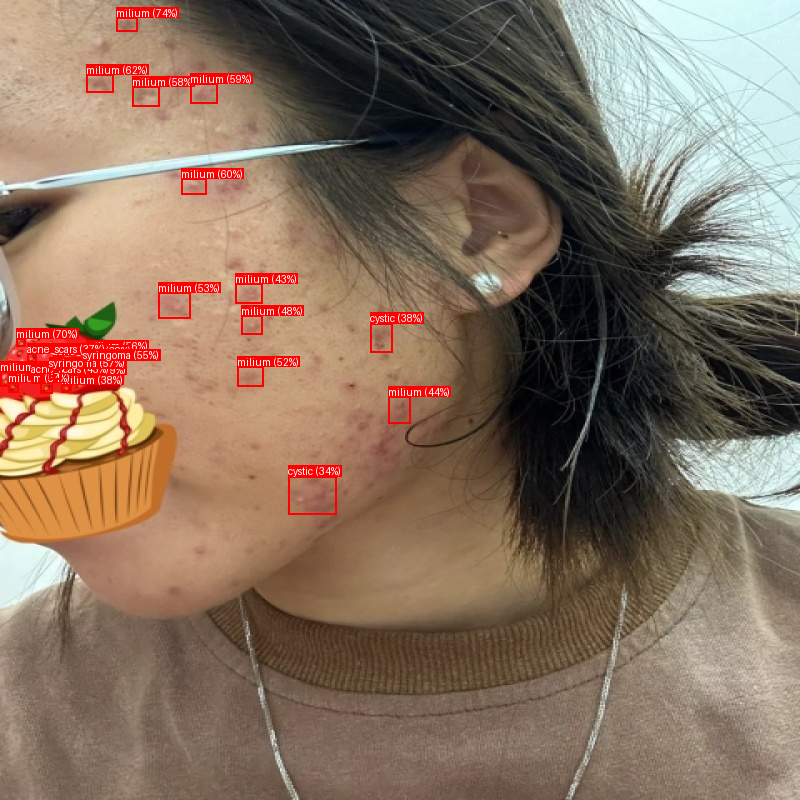

Bounding Boxes: [{'class_id': 'cystic', 'cords': [370, 323, 392, 352], 'percentage_conf': '38'}, {'class_id': 'milium', 'cords': [86, 350, 95, 359], 'percentage_conf': '56'}, {'class_id': 'cystic', 'cords': [288, 476, 336, 514], 'percentage_conf': '34'}, {'class_id': 'milium', 'cords': [16, 338, 25, 346], 'percentage_conf': '70'}, {'class_id': 'milium', 'cords': [64, 374, 75, 384], 'percentage_conf': '59'}, {'class_id': 'milium', 'cords': [0, 371, 9, 386], 'percentage_conf': '38'}, {'class_id': 'acne_scars', 'cords': [53, 355, 63, 364], 'percentage_conf': '38'}, {'class_id': 'milium', 'cords': [40, 382, 52, 393], 'percentage_conf': '49'}, {'class_id': 'milium', 'cords': [116, 17, 137, 31], 'percentage_conf': '74'}, {'class_id': 'milium', 'cords': [388, 396, 410, 423], 'percentage_conf': '44'}, {'class_id': 'milium', 'cords': [61, 384, 71, 392], 'percentage_conf': '38'}, {'class_id': 'milium', 'cords': [8, 382, 18, 392], 'percentage_conf': '54'}, {'class_id': 'milium', 'cords': [241, 31

In [ ]:


# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =    "https://6926-35-185-166-129.ngrok-free.app"  # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/473026032_1263662471528750_8799095583983098227_n.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


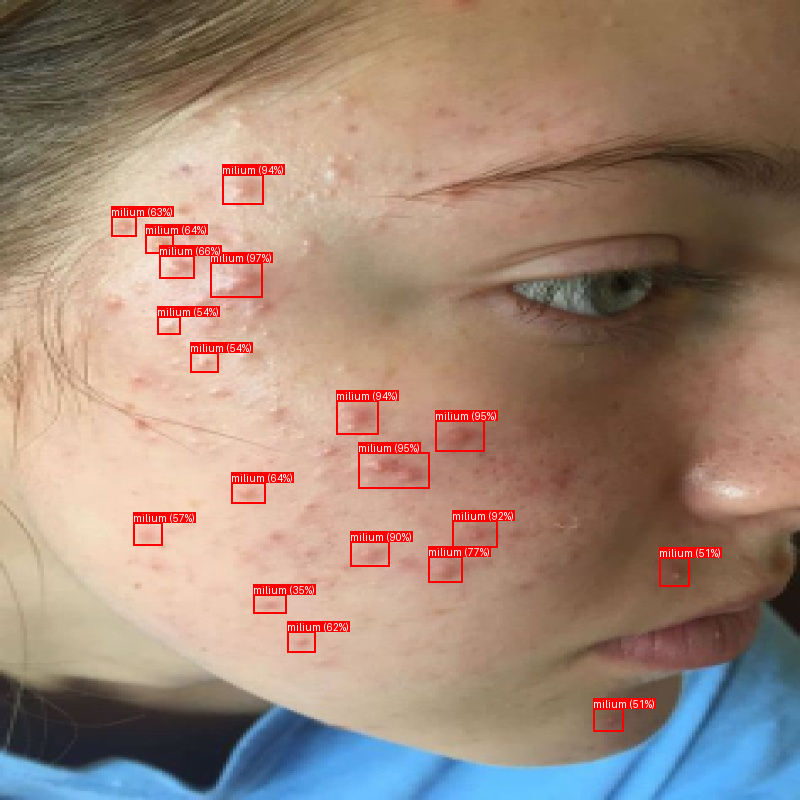

Bounding Boxes: [{'class_id': 'milium', 'cords': [336, 400, 378, 434], 'percentage_conf': '94'}, {'class_id': 'milium', 'cords': [428, 556, 462, 582], 'percentage_conf': '77'}, {'class_id': 'milium', 'cords': [287, 631, 315, 652], 'percentage_conf': '62'}, {'class_id': 'milium', 'cords': [435, 420, 484, 451], 'percentage_conf': '95'}, {'class_id': 'milium', 'cords': [133, 522, 162, 545], 'percentage_conf': '57'}, {'class_id': 'milium', 'cords': [145, 234, 173, 253], 'percentage_conf': '64'}, {'class_id': 'milium', 'cords': [111, 216, 136, 236], 'percentage_conf': '63'}, {'class_id': 'milium', 'cords': [358, 452, 429, 488], 'percentage_conf': '95'}, {'class_id': 'milium', 'cords': [222, 174, 263, 204], 'percentage_conf': '94'}, {'class_id': 'milium', 'cords': [210, 262, 262, 297], 'percentage_conf': '97'}, {'class_id': 'milium', 'cords': [231, 482, 265, 503], 'percentage_conf': '64'}, {'class_id': 'milium', 'cords': [190, 352, 218, 372], 'percentage_conf': '54'}, {'class_id': 'milium', 

In [7]:


# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =     "https://d072-34-74-18-147.ngrok-free.app"  # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/Acne Treatment From Home - Family Fitness Travel.jpeg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


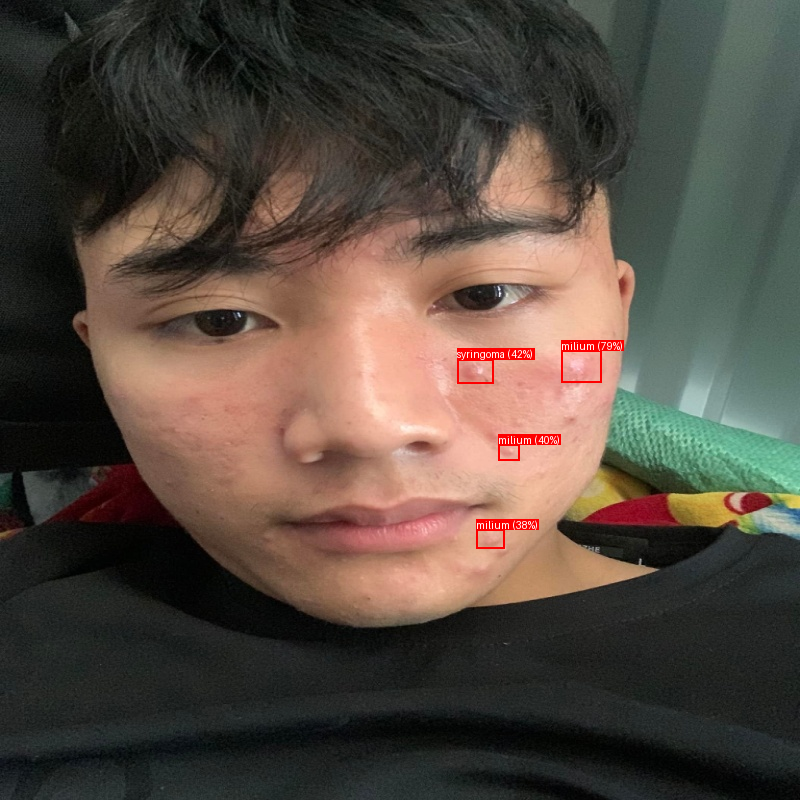

Bounding Boxes: [{'class_id': 'syringoma', 'cords': [457, 359, 493, 383], 'percentage_conf': '42'}, {'class_id': 'milium', 'cords': [498, 444, 519, 460], 'percentage_conf': '40'}, {'class_id': 'milium', 'cords': [476, 529, 504, 548], 'percentage_conf': '38'}, {'class_id': 'milium', 'cords': [561, 350, 601, 382], 'percentage_conf': '79'}]
Total Acnes: 4
Time Taken: 7.59 giây


In [4]:


# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =      "https://d072-34-74-18-147.ngrok-free.app" # Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/474794893_1359270295441755_5529552123904889979_n.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


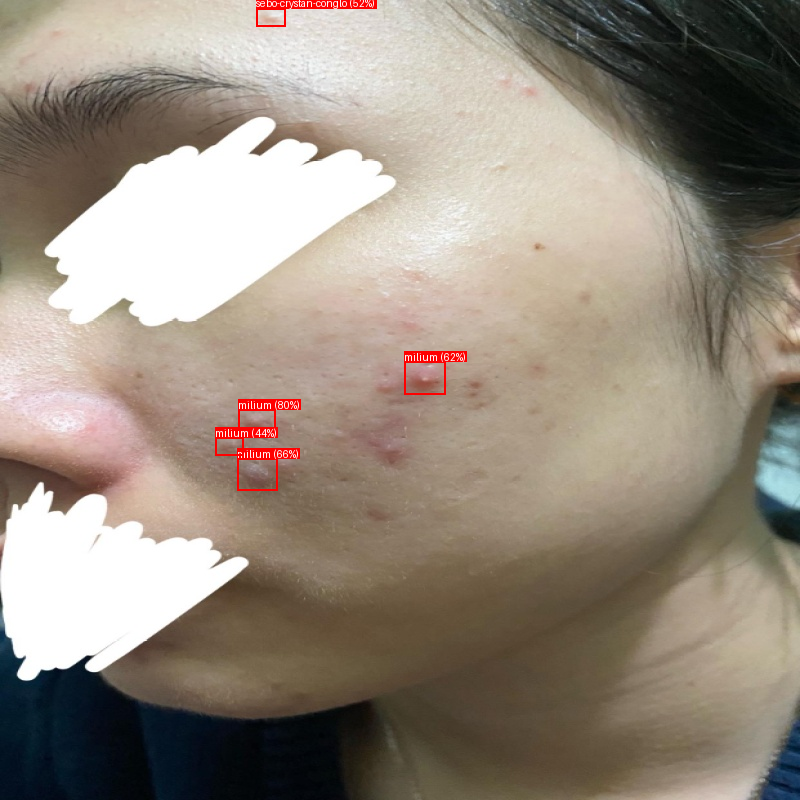

Bounding Boxes: [{'class_id': 'milium', 'cords': [238, 409, 275, 436], 'percentage_conf': '80'}, {'class_id': 'milium', 'cords': [237, 458, 277, 490], 'percentage_conf': '66'}, {'class_id': 'milium', 'cords': [404, 361, 445, 394], 'percentage_conf': '62'}, {'class_id': 'milium', 'cords': [215, 437, 243, 455], 'percentage_conf': '44'}, {'class_id': 'sebo-crystan-conglo', 'cords': [256, 8, 285, 26], 'percentage_conf': '52'}]
Total Acnes: 5
Time Taken: 6.2 giây


In [5]:


# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =     "https://d072-34-74-18-147.ngrok-free.app"# Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/484733312_1822275491941462_606158523596026594_n.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")


Ảnh đã được lưu tại: decoded_output.png


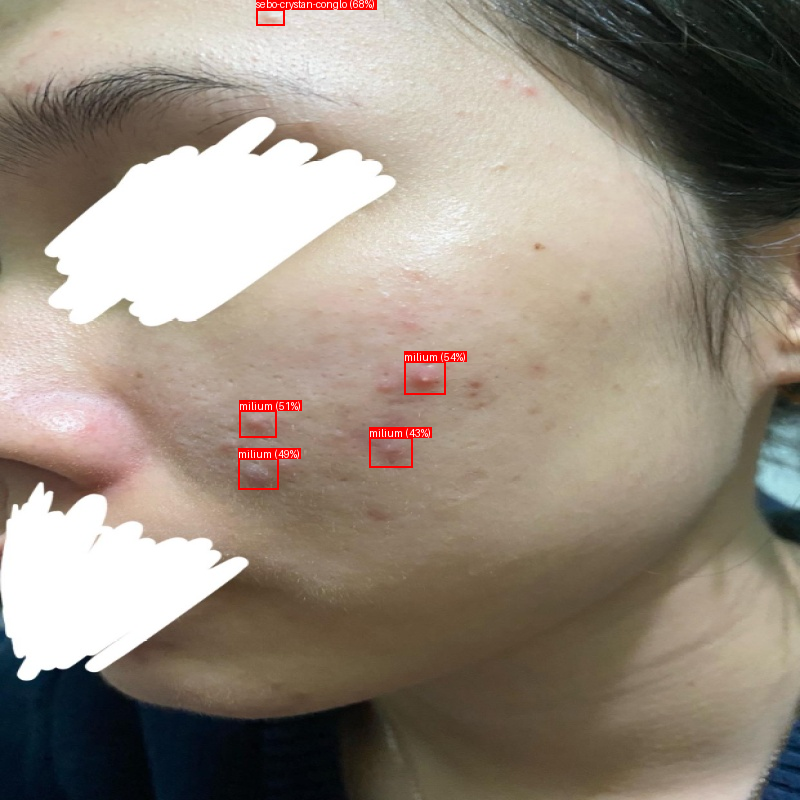

Bounding Boxes: [{'class_id': 'milium', 'cords': [239, 410, 276, 437], 'percentage_conf': '51'}, {'class_id': 'milium', 'cords': [404, 361, 445, 394], 'percentage_conf': '54'}, {'class_id': 'milium', 'cords': [238, 458, 278, 489], 'percentage_conf': '49'}, {'class_id': 'sebo-crystan-conglo', 'cords': [256, 9, 284, 25], 'percentage_conf': '68'}, {'class_id': 'milium', 'cords': [369, 437, 412, 467], 'percentage_conf': '43'}]
Total Acnes: 5
Time Taken: 7.91 giây


In [16]:


# cắt 9 lát

# cắt 1 lát
import requests
import base64
import io
from PIL import Image
import os

# Hàm giải mã và lưu ảnh từ base64
def decode_base64_and_save_image(base64_string, output_path):
    try:
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(output_path)
        print(f"Ảnh đã được lưu tại: {output_path}")
        return output_path
    except Exception as e:
        print("Lỗi khi giải mã ảnh:", e)
        return None

# Cấu hình API
NGROK_URL =    "https://9d0b-34-74-18-147.ngrok-free.app"# Thay URL ngrok thực tế
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Đường dẫn ảnh thử nghiệm
image_path = "/content/484733312_1822275491941462_606158523596026594_n.jpg"

if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy tệp tại {image_path}")
else:
    try:
        # Gửi ảnh tới API
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        if response.status_code == 200:
            result = response.json()

            # Giải mã và lưu ảnh
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)

                # Hiển thị ảnh đã xử lý
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Lỗi: Không tìm thấy ảnh kết quả trong phản hồi.")

            # In kết quả bounding box và số lượng mụn
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} giây")
        else:
            print(f"Lỗi: Máy chủ trả về mã {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:

        print(f"Lỗi khi kết nối đến máy chủ: {e}")

        print(f"Lỗi không mong muốn: {e}")
